# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Susmitha Kalidindi 
- Alyssa Ashmore 
- Shardul Saiya 
- Siyi Wang


# Group Members IDs

- A13167684
- A12833150
- A13964199
- A53233349

# Research Question

- Question 1: Want to study how strong the correlation is between words used in product reviews with the ratings given for that product
- Question 2: Want to study the relationship between specific language that users use in reviews, the value of the  ratings they give and whether they are “fake” or incentivized reviews

Edit: Mapping the keywords in Amazon review text against the review ratings to see if words can be used to predict ratings.

## Background and Prior Work

Background:

References:
- 1) https://reviewmeta.com/
- 2) 

# Hypothesis


# Dataset(s)

Dataset Name: Consumer Reviews of Amazon Products
Link to the dataset: https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products#Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv
Number of observations: 34,000 reviews

This dataset contains a list of over 34,000 reviews of Amazon products like the Kindle, Fire TV, including measures on the 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## Import Data from CSV file here, SEE Project proposal for link to csv file
import pandas as pd 
dfraw = pd.read_csv("../consumer-reviews-of-amazon-products/1429_1.csv", engine = 'python')
df2 = pd.read_csv("../consumer-reviews-of-amazon-products/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv", engine = 'python')


# Data Cleaning

Describe your data cleaning steps here.

In [2]:
# Get rid of most unwanted rows, only keep 
# Name, Category, Reviews.DoRecommend, Review.numHelpful, Reviews.ratings, Review.text, Review.title 

df1 = dfraw.drop(['asins', 'brand', 'keys', 'manufacturer', 'reviews.sourceURLs', 'reviews.userCity', 
                  'reviews.userProvince', 'reviews.username', 'reviews.dateAdded', 'reviews.dateSeen', 
                  'reviews.didPurchase' , 'reviews.id', 'id' ], axis=1)

#get rid of rewiews without ratings
df1 = df1.dropna(subset=['reviews.rating', 'reviews.text', 'reviews.text'])

# Now df1 contains:
# name, categories, reviews.date, reviews.doRecommend,
# reviews.numHelpful, reviews.rating, reviews.text, reviews.title

In [3]:
#helper function to filter data
def filter_review(review):
    # Convert to string
    string = str(review)
    
    # Data Filtering
    string = string.replace('.', ' ')
    string = string.replace(',', ' ')
    string = string.replace('-', ' ')
    # string = string.replace('\'', ' ')
    string = string.replace('\"', ' ')
    string = string.replace('/', ' ')
    string = string.replace('(', ' ')
    string = string.replace(')', ' ')
    string = string.replace('!', ' ')
    string = string.replace('?', ' ')
    string = string.replace('=', ' ')
    string = string.replace('+', ' ')
    string = string.replace('-', ' ')
    string = string.replace('�', '')
    string = string.replace('☺️', ' ')
    string = string.replace('&', ' ')
    string = string.replace('$', ' ')
    string = string.replace('*', ' ')
    string = string.replace('%', ' ')

    
    return string

In [4]:
# dictionary to count all unique words in customer reviews
# contains word : frequency
words_dict = {}

# Helper function to count words in a string 
# This function directly modifies the words_dict declared above
def word_frequency_counter(review):
    
    string = filter_review(review)

    # Convert to lower case and split
    my_string = string.lower().split()
    for item in my_string:
        if item in words_dict:
            words_dict[item] += 1
        else:
            words_dict[item] = 1

In [5]:
# dictionary to count raw rating value of each word
rating_dict = {}

#Helper function to add up raw review values for each word and 
def rating_counter(review, rating):
    string = filter_review(review)
    rating = int(rating)
    
    # Convert to lower case and split
    my_string = string.lower().split()
    for item in my_string:
        if item in rating_dict:
            rating_dict[item] = rating_dict[item] + rating
        else:
            rating_dict[item] = rating
    

In [14]:
for review in df1['reviews.text']:
    word_frequency_counter(review)
print(words_dict)
for index, row in df1.iterrows():
    rating_counter(row['reviews.text'], row['reviews.rating'])

{'this': 88290, 'product': 17885, 'so': 30480, 'far': 5085, 'has': 19990, 'not': 27655, 'disappointed': 1120, 'my': 86505, 'children': 2175, 'love': 33115, 'to': 168270, 'use': 38375, 'it': 154455, 'and': 168840, 'i': 159365, 'like': 19075, 'the': 219765, 'ability': 1650, 'monitor': 210, 'control': 3575, 'what': 11295, 'content': 2220, 'they': 14395, 'see': 2800, 'with': 47345, 'ease': 1610, 'great': 59230, 'for': 131580, 'beginner': 635, 'or': 15450, 'experienced': 130, 'person': 1010, 'bought': 25295, 'as': 31950, 'a': 124390, 'gift': 10140, 'she': 20260, 'loves': 13165, 'inexpensive': 1370, 'tablet': 45310, 'him': 2230, 'learn': 1535, 'on': 41920, 'step': 450, 'up': 17735, 'from': 13090, 'nabi': 110, 'he': 10135, 'was': 32380, 'thrilled': 345, 'how': 6520, 'skype': 160, 'already': 2315, "i've": 3840, 'had': 14625, 'fire': 24060, 'hd': 2325, '8': 2580, 'two': 3750, 'weeks': 1065, 'now': 7560, 'is': 103810, 'value': 2680, 'we': 17730, 'are': 18660, 'prime': 6895, 'members': 690, 'that

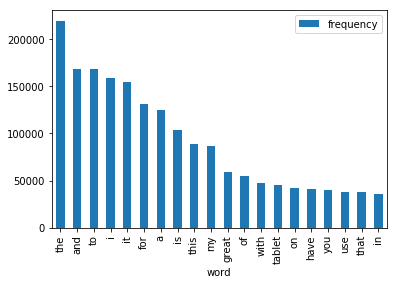

In [34]:
# TODO
# Visualize word frequency's for top words with a histogram or some other graph
sorted_words_list = list(sorted(words_dict.items(), key=lambda item: item[1], reverse=True))
words_list_20 = sorted_words_list[0:20] 
df_words = pd.DataFrame(words_list_20, columns=['word', 'frequency'])
df_words.plot(kind='bar', x='word')

In [ ]:
# TODO: (Susmitha) visualize the graph removing neutral words like "the", "it" to see if popular words are mainly positive or negative
# using NLTK 

In [8]:
# Now we have two dictionaries
# word_dict contains words associated with their frequency in all the ratings
# rating_dict_raw cotains words associated with their raw rating values, summed up


# Now we want to divide the values in rating_dict by the frequency values in word_dict
# Thats what this helper function does, and saves it in rating_dict
def ratings_avg(word_dict, rating_dict):
    for item in word_dict:
        if item in rating_dict:
            rating_dict[item] = rating_dict[item]/word_dict[item]
        else:
            print('This shouldnt happen !!')
    

In [35]:
ratings_avg(words_dict, rating_dict)
print(rating_dict)

{'this': 3.6437711479154005, 'product': 3.6506884563407893, 'so': 3.631907470412163, 'far': 3.6335380150035435, 'has': 3.671665297381057, 'not': 3.2662477897379643, 'disappointed': 2.992621970663265, 'my': 3.698105572685621, 'children': 3.57170669837495, 'love': 3.8497602904642196, 'to': 3.5864769897363438, 'use': 3.6814749627051744, 'it': 3.5711661255480918, 'and': 3.666954416365112, 'i': 3.605085848975404, 'like': 3.5225375037145574, 'the': 3.58204662950342, 'ability': 3.682787878787879, 'monitor': 3.7363945578231292, 'control': 3.6756903516064354, 'what': 3.546740410352099, 'content': 3.5839988637285938, 'they': 3.5540425263924447, 'see': 3.4786951530612247, 'with': 3.612219139396249, 'ease': 3.759438293275722, 'great': 3.7473017732291747, 'for': 3.6168150248961255, 'beginner': 3.5155682311364624, 'or': 3.5226150752505734, 'experienced': 3.7278106508875744, 'person': 3.5211841976276834, 'bought': 3.646908812443294, 'as': 3.579858361436223, 'a': 3.5807418271750593, 'gift': 3.71919609

In [10]:
# TODO
# Visualize these average rating values with words


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [44]:
# Now rating_dict has what we need to go ahead


# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*